First model is a simple one with no data augmentation

In [27]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

train_data_dir = r"C:\Users\Trenton\Documents\GitHub\Crops-Capstone-3\crop_images"
test_data_dir = r"C:\Users\Trenton\Documents\GitHub\Crops-Capstone-3\test_crop_image"

# class labels
class_labels = sorted(os.listdir(train_data_dir))

# Convert class labels to integer indices
class_indices = {class_label: index for index, class_label in enumerate(class_labels)}

# arrays
train_data = []
train_labels = []

# Loop through each class to collect training data
for class_label in class_labels:
    class_dir = os.path.join(train_data_dir, class_label)
    image_files = os.listdir(class_dir)
    
    for image_name in image_files:
        image_path = os.path.join(class_dir, image_name)
        image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
        image_array = tf.keras.preprocessing.image.img_to_array(image)
        train_data.append(image_array)
        train_labels.append(class_indices[class_label])

# Convert lists to arrays
train_data = np.array(train_data)
train_labels = np.array(train_labels)

# Convert labels to one-hot encoded vectors
train_labels_onehot = to_categorical(train_labels, num_classes=len(class_labels))

# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_labels), activation='softmax')  # Output layer with units equal to the number of classes
])

# Compile
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',  # Use categorical_crossentropy for multi-class
              metrics=['accuracy'])

# Train
history = model.fit(train_data, train_labels_onehot, epochs=15, batch_size=32)
history1 = history

# Load and preprocess
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

# Evaluate the model on the test data
loss, accuracy = model.evaluate_generator(test_generator)
print("Test Accuracy:", accuracy)

Epoch 1/15
7/7 [==============================] - 2s 210ms/step - loss: 570.5031 - accuracy: 0.2139
Epoch 2/15
7/7 [==============================] - 1s 209ms/step - loss: 27.9131 - accuracy: 0.2637
Epoch 3/15
7/7 [==============================] - 1s 209ms/step - loss: 2.0189 - accuracy: 0.3831
Epoch 4/15
7/7 [==============================] - 1s 207ms/step - loss: 1.2498 - accuracy: 0.4925
Epoch 5/15
7/7 [==============================] - 2s 219ms/step - loss: 0.9846 - accuracy: 0.7612
Epoch 6/15
7/7 [==============================] - 2s 241ms/step - loss: 0.6176 - accuracy: 0.8308
Epoch 7/15
7/7 [==============================] - 2s 218ms/step - loss: 0.5745 - accuracy: 0.8507
Epoch 8/15
7/7 [==============================] - 2s 218ms/step - loss: 0.4726 - accuracy: 0.8458
Epoch 9/15
7/7 [==============================] - 2s 210ms/step - loss: 0.3412 - accuracy: 0.9154
Epoch 10/15
7/7 [==============================] - 2s 225ms/step - loss: 0.2567 - accuracy: 0.9602
Epoch 11/15
7/7 

C:\Users\Trenton\AppData\Local\Temp\ipykernel_528\2816035399.py:73: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, accuracy = model.evaluate_generator(test_generator)


Test Accuracy: 0.31111112236976624


Let's try the same model but adding data augmentation using the ImageDataGenerator 

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

test_datagen = ImageDataGenerator(rescale=1.0/255.0)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

history = model.fit(train_generator, epochs=15)
history2 = history
loss, accuracy = model.evaluate_generator(test_generator)
print("Test Accuracy:", accuracy)

Found 201 images belonging to 5 classes.
Found 45 images belonging to 5 classes.
Epoch 1/15
7/7 [==============================] - 2s 231ms/step - loss: 1.6042 - accuracy: 0.2338
Epoch 2/15
7/7 [==============================] - 2s 223ms/step - loss: 1.5871 - accuracy: 0.2786
Epoch 3/15
7/7 [==============================] - 2s 234ms/step - loss: 1.5669 - accuracy: 0.2687
Epoch 4/15
7/7 [==============================] - 2s 239ms/step - loss: 1.5368 - accuracy: 0.3184
Epoch 5/15
7/7 [==============================] - 2s 224ms/step - loss: 1.4895 - accuracy: 0.3731
Epoch 6/15
7/7 [==============================] - 2s 231ms/step - loss: 1.4571 - accuracy: 0.3781
Epoch 7/15
7/7 [==============================] - 2s 230ms/step - loss: 1.4871 - accuracy: 0.3184
Epoch 8/15
7/7 [==============================] - 2s 224ms/step - loss: 1.3959 - accuracy: 0.4378
Epoch 9/15
7/7 [==============================] - 2s 258ms/step - loss: 1.4494 - accuracy: 0.3433
Epoch 10/15
7/7 [====================

C:\Users\Trenton\AppData\Local\Temp\ipykernel_528\3488843209.py:32: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss, accuracy = model.evaluate_generator(test_generator)


Test Accuracy: 0.4444444477558136


The next model with have a higher batch_size and a smaller learning_rate to see if that increases testing accuracy

In [29]:
# hyperparameters
batch_size = 64
epochs = 15
learning_rate = 0.0001

# Rest of your code remains the same

# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(class_labels), activation='softmax')
])

# Compile the model with adjusted learning rate
model.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Calculate steps_per_epoch and validation_steps
train_steps = len(train_generator)
test_steps = len(test_generator)

# Train
history = model.fit(train_generator, epochs=epochs, steps_per_epoch=train_steps,
                    validation_data=test_generator, validation_steps=test_steps)
history3 = history

# Evaluate
loss, accuracy = model.evaluate(test_generator, steps=test_steps)
print("Test Accuracy:", accuracy)

Epoch 1/15
7/7 [==============================] - 3s 339ms/step - loss: 1.7162 - accuracy: 0.2338 - val_loss: 1.5773 - val_accuracy: 0.3333
Epoch 2/15
7/7 [==============================] - 2s 291ms/step - loss: 1.6890 - accuracy: 0.2139 - val_loss: 1.5931 - val_accuracy: 0.2000
Epoch 3/15
7/7 [==============================] - 2s 289ms/step - loss: 1.5917 - accuracy: 0.2786 - val_loss: 1.5326 - val_accuracy: 0.4000
Epoch 4/15
7/7 [==============================] - 2s 280ms/step - loss: 1.5544 - accuracy: 0.3333 - val_loss: 1.5003 - val_accuracy: 0.4444
Epoch 5/15
7/7 [==============================] - 2s 299ms/step - loss: 1.5504 - accuracy: 0.2836 - val_loss: 1.4570 - val_accuracy: 0.4889
Epoch 6/15
7/7 [==============================] - 2s 316ms/step - loss: 1.5198 - accuracy: 0.3881 - val_loss: 1.3711 - val_accuracy: 0.5111
Epoch 7/15
7/7 [==============================] - 2s 293ms/step - loss: 1.4854 - accuracy: 0.3831 - val_loss: 1.3552 - val_accuracy: 0.5778
Epoch 8/15
7/7 [====

The model below includes data augmentation and a much deeper network consisting of more nodes. The learning_rate is changed back to 0.001

In [30]:
from tensorflow.keras.layers import BatchNormalization

datagen = ImageDataGenerator(
    rescale=1.0/255.0,  
    rotation_range=20,   
    width_shift_range=0.2,  
    height_shift_range=0.2, 
    zoom_range=0.2,      
    horizontal_flip=True,
)

train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Conv2D(512, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(class_labels), activation='softmax')
])

# Compile
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(train_generator, epochs=15, steps_per_epoch=train_steps,
                    validation_data=test_generator, validation_steps=test_steps)
history4 = history

# Evaluate
loss, accuracy = model.evaluate(test_generator)
print("Test Accuracy:", accuracy)

Found 201 images belonging to 5 classes.
Epoch 1/15
7/7 [==============================] - 8s 945ms/step - loss: 7.0458 - accuracy: 0.2239 - val_loss: 2.0506 - val_accuracy: 0.1556
Epoch 2/15
7/7 [==============================] - 6s 891ms/step - loss: 8.8999 - accuracy: 0.3134 - val_loss: 7.1923 - val_accuracy: 0.2889
Epoch 3/15
7/7 [==============================] - 7s 915ms/step - loss: 11.1740 - accuracy: 0.3284 - val_loss: 5.0692 - val_accuracy: 0.0667
Epoch 4/15
7/7 [==============================] - 7s 956ms/step - loss: 9.4458 - accuracy: 0.3532 - val_loss: 6.6567 - val_accuracy: 0.1333
Epoch 5/15
7/7 [==============================] - 6s 893ms/step - loss: 11.3865 - accuracy: 0.2935 - val_loss: 7.4954 - val_accuracy: 0.2889
Epoch 6/15
7/7 [==============================] - 7s 913ms/step - loss: 11.5337 - accuracy: 0.3532 - val_loss: 9.7573 - val_accuracy: 0.2000
Epoch 7/15
7/7 [==============================] - 7s 906ms/step - loss: 11.6110 - accuracy: 0.3234 - val_loss: 17.74

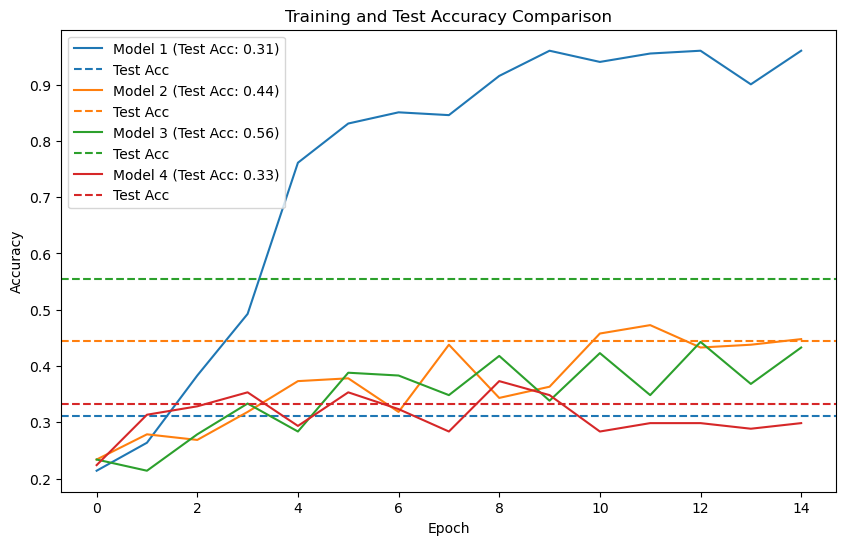

In [32]:
import matplotlib.pyplot as plt

# List of training histories for each network
histories = [history1, history2, history3, history4]  # Replace with actual histories
test_accuracies = [0.311, 0.444, 0.555, 0.333]  # Replace with actual test accuracies

plt.figure(figsize=(10, 6))

# Plot training accuracy with custom labels
for idx, (history, test_accuracy) in enumerate(zip(histories, test_accuracies)):
    label = f'Model {idx+1} (Test Acc: {test_accuracy:.2f})'  # Custom label
    plt.plot(history.history['accuracy'], label=label)
    
    # Add dashed lines for test accuracy
    color = plt.gca().lines[-1].get_color()  # Get the color of the last plotted line
    plt.axhline(y=test_accuracy, color=color, linestyle='--', label='Test Acc')

plt.title('Training and Test Accuracy Comparison')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Model 1 seemed to do the best job at fitting the training data, but it seemed to overfit since the test prediction was the lowest of all 4 models. Model 4 was the second lowest which possibly suggests that the network was too large for the data. Model 2 increased the accuracy from model 1 since it added data augmentation. Model 3 scored the best at 0.56 which is when we increased the batch size and lowered the learning rate. In future models I would add data augmentation to model 3 as well as try different learning rates.  